# Air-traffic prediction with LSTM NN

115 29
Train on 113 samples
Epoch 1/100
113/113 - 3s - loss: 0.0816
Epoch 2/100
113/113 - 0s - loss: 0.0622
Epoch 3/100
113/113 - 0s - loss: 0.0477
Epoch 4/100
113/113 - 0s - loss: 0.0371
Epoch 5/100
113/113 - 0s - loss: 0.0300
Epoch 6/100
113/113 - 0s - loss: 0.0253
Epoch 7/100
113/113 - 0s - loss: 0.0226
Epoch 8/100
113/113 - 0s - loss: 0.0209
Epoch 9/100
113/113 - 0s - loss: 0.0198
Epoch 10/100
113/113 - 0s - loss: 0.0190
Epoch 11/100
113/113 - 0s - loss: 0.0184
Epoch 12/100
113/113 - 0s - loss: 0.0177
Epoch 13/100
113/113 - 0s - loss: 0.0172
Epoch 14/100
113/113 - 0s - loss: 0.0164
Epoch 15/100
113/113 - 0s - loss: 0.0159
Epoch 16/100
113/113 - 0s - loss: 0.0152
Epoch 17/100
113/113 - 0s - loss: 0.0146
Epoch 18/100
113/113 - 0s - loss: 0.0140
Epoch 19/100
113/113 - 0s - loss: 0.0133
Epoch 20/100
113/113 - 0s - loss: 0.0126
Epoch 21/100
113/113 - 0s - loss: 0.0120
Epoch 22/100
113/113 - 0s - loss: 0.0114
Epoch 23/100
113/113 - 0s - loss: 0.0107
Epoch 24/100
113/113 - 0s - loss: 0.01

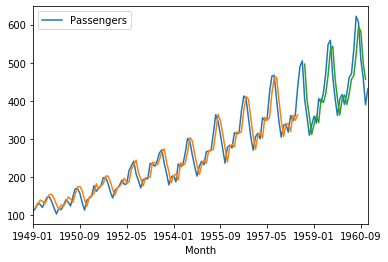

In [87]:
import math

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


filepath = '/Users/Alan/Desktop/airline-passengers.txt'
data = pd.read_csv(filepath, engine = 'python')
data.index = data.Month
dataset = data.Passengers.values.reshape(-1,1)
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=2)



trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
data.plot()
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
